# Various visualizations to determine how good the tracking is

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import pandas as pd
%load_ext autoreload
%autoreload 2

from DLC_for_WBFM.utils.feature_detection.utils_features import *
from DLC_for_WBFM.utils.feature_detection.utils_tracklets import *
from DLC_for_WBFM.utils.feature_detection.utils_detection import *
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import *
from DLC_for_WBFM.utils.feature_detection.feature_pipeline import *
from DLC_for_WBFM.utils.feature_detection.utils_affine import *
from DLC_for_WBFM.utils.feature_detection.class_reference_frame import PreprocessingSettings
import pickle

In [6]:
which_suffix = 'affine-and-features'
# which_suffix = 'sequential7'

fname = f'clust_df_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
    clust_df = pickle.load(f)
    
fname = f'match_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
#     all_matches, all_conf = pickle.load(f)
    all_matches = pickle.load(f)

In [ ]:
clust_df.columns

In [4]:
#new_matches

# Positions of tracked neurons

In [12]:
all_len = clust_df['slice_ind'].apply(len)

In [13]:
which_neuron = 0
min_length = 400
all_long_enough = np.where(all_len>min_length)[0]

ind = all_long_enough[which_neuron]
xyz = np.asarray(clust_df['all_xyz'].iloc[ind])

<IPython.core.display.Javascript object>


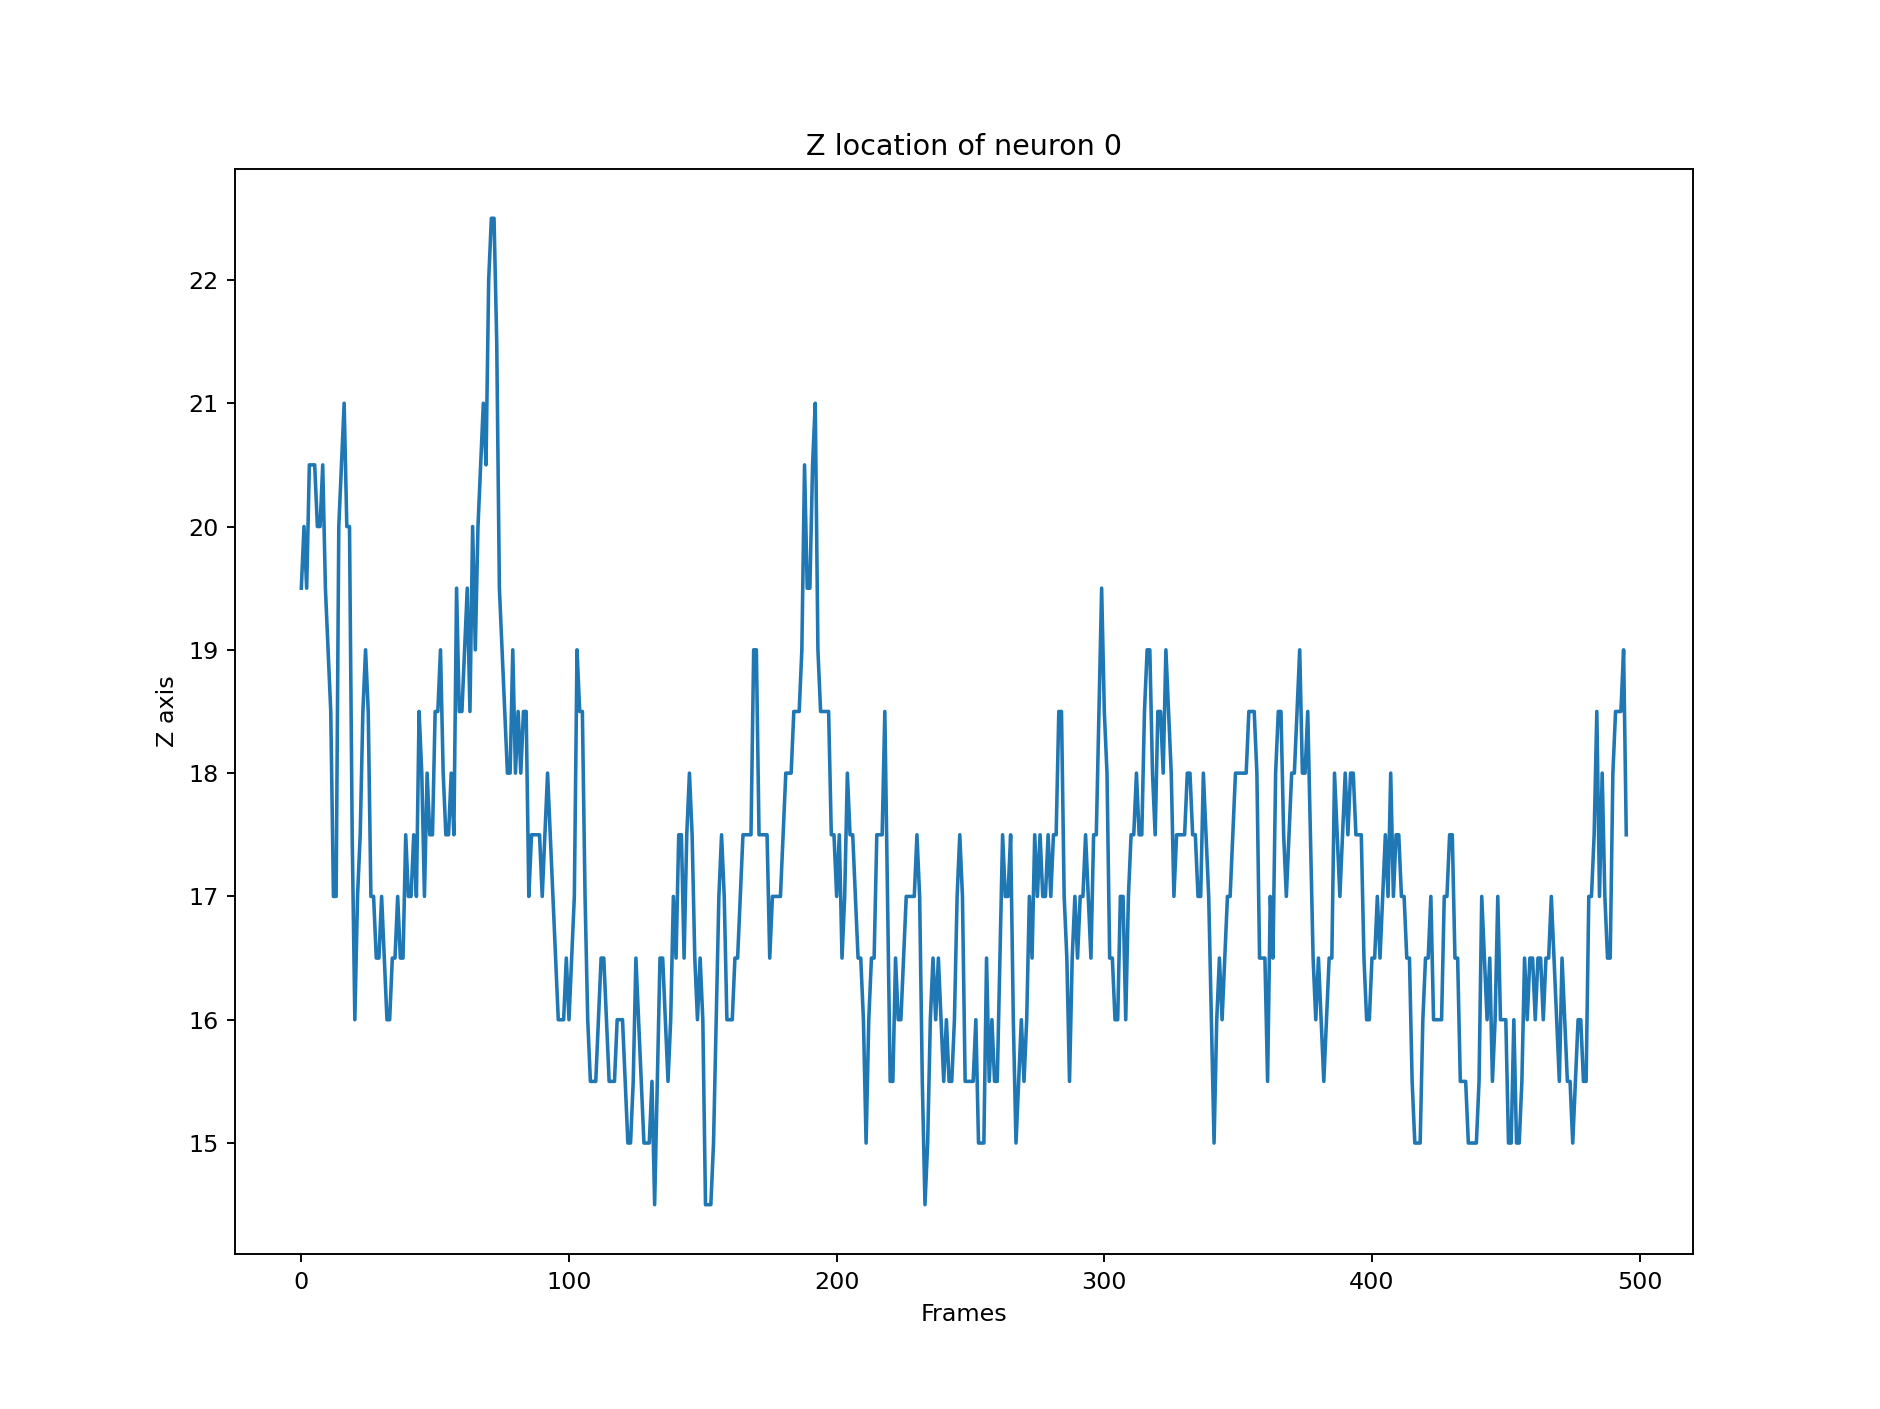

Text(0.5, 1.0, 'Z location of neuron 0')

In [14]:
%matplotlib notebook
plt.plot(xyz[:,0])
plt.xlabel("Frames")
plt.ylabel("Z axis")
plt.title(f"Z location of neuron {which_neuron}")

# Basic track statistics

## Track length

In [28]:
all_len = clust_df['slice_ind'].apply(len)

Text(0.5, 1.0, 'Lengths of individual tracks (minimum=20)')

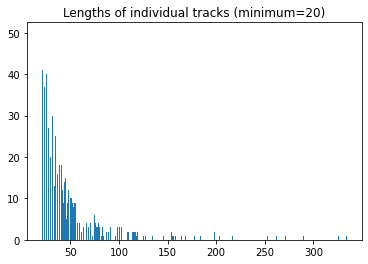

In [5]:
min_len = 20
num_frames = 500
bins = int((num_frames-min_len))
plt.hist(all_len[all_len>min_len], bins=bins);
plt.title(f"Lengths of individual tracks (minimum={min_len})")

## Matches per pair of frames

In [6]:
all_num_matches = [len(val) for k, val in all_matches.items()]

Text(0.5, 1.0, 'Number of matches between each frame')

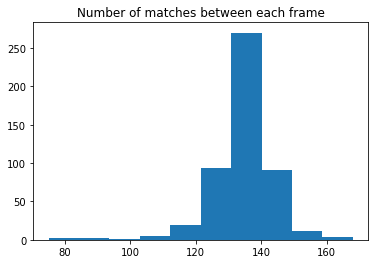

In [7]:
plt.hist(all_num_matches);
plt.title("Number of matches between each frame")

Text(0.5, 1.0, 'Number of matches between each frame')

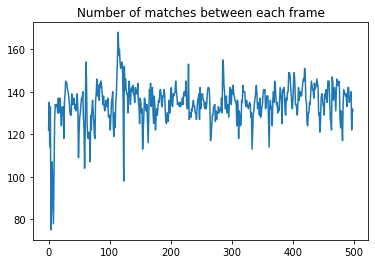

In [8]:
plt.plot(all_num_matches);
plt.title("Number of matches between each frame")

## Number of tracks that end on a frame 

In [12]:
all_end_frames = [s[-1] for s in clust_df['slice_ind']]

<IPython.core.display.Javascript object>


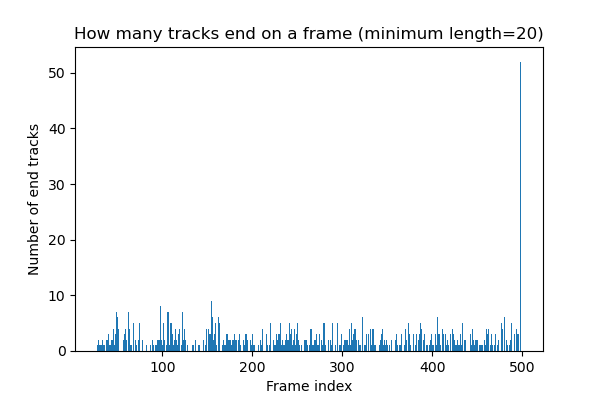

Text(0, 0.5, 'Number of end tracks')

In [85]:
%matplotlib notebook

min_len = 20
num_frames = 500
bins = int((num_frames-min_len))
plt.hist(np.array(all_end_frames)[np.array(all_len)>min_len], bins=bins);
plt.title(f"How many tracks end on a frame (minimum length={min_len})")
plt.xlabel('Frame index')
plt.ylabel('Number of end tracks')

## Number of tracks that cover a frame

In [7]:
from collections import defaultdict
all_num_tracks = defaultdict(int)
min_len = 20
for row in clust_df['slice_ind']:
    if len(row) < min_len:
        continue
    for ind in row:
        all_num_tracks[ind] += 1

num_frames = 500
all_num = np.zeros(num_frames)
for k, val in all_num_tracks.items():
    all_num[k] = val

In [8]:

# bins = int((num_frames-min_len))
# plt.hist(all_num, bins=bins)
# plt.xlabel("Number of covers")
# plt.ylabel("Number of frames (with that number of covers)")
# plt.title(f"Number of tracks on each frame of min length {min_len}")

<IPython.core.display.Javascript object>


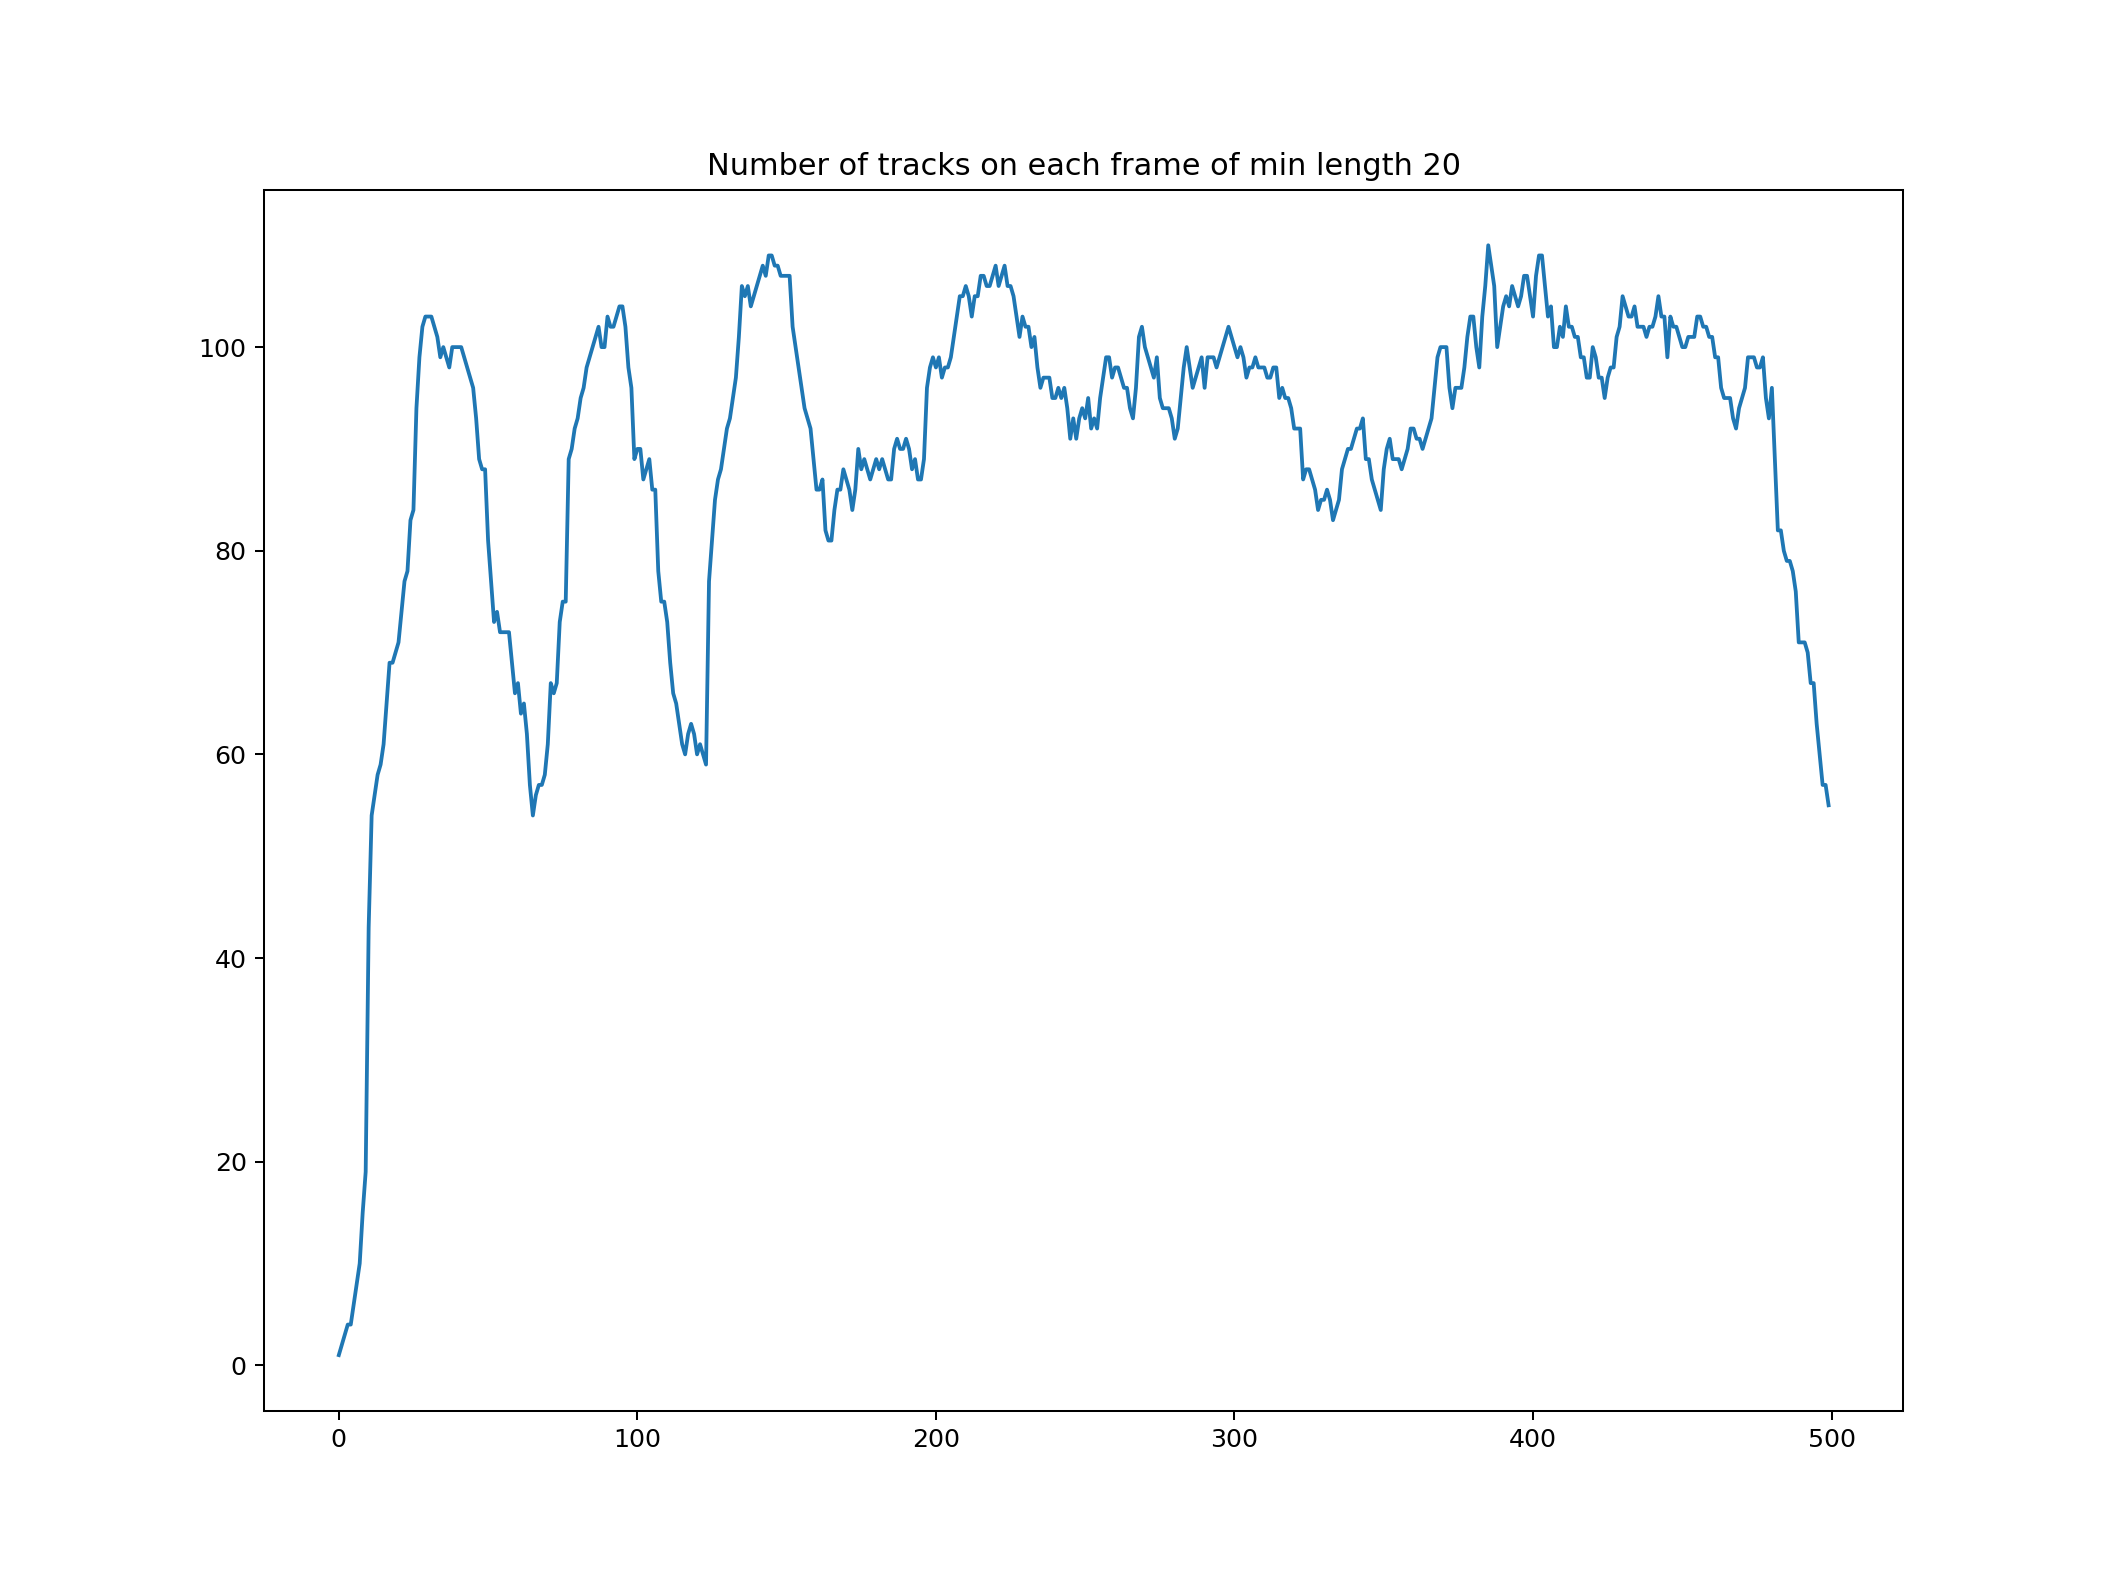

Text(0.5, 1.0, 'Number of tracks on each frame of min length 20')

In [9]:
%matplotlib notebook

plt.plot(all_num)
plt.title(f"Number of tracks on each frame of min length {min_len}")

## Number of tracks that cover entire windows

Same as above, but the to be counted the track must cover an entire window

In [83]:
from collections import defaultdict
all_num_tracks = defaultdict(int)
min_len = 20
window_len = 20
for row in clust_df['slice_ind']:
    if len(row) < min_len:
        continue
    for ind in row:
        if ind == (row[-1]-window_len):
            break
        all_num_tracks[ind] += 1

num_frames = 500
num_windows = num_frames - window_len
all_num = np.zeros(num_frames)
for k, val in all_num_tracks.items():
    all_num[k] = val

<IPython.core.display.Javascript object>


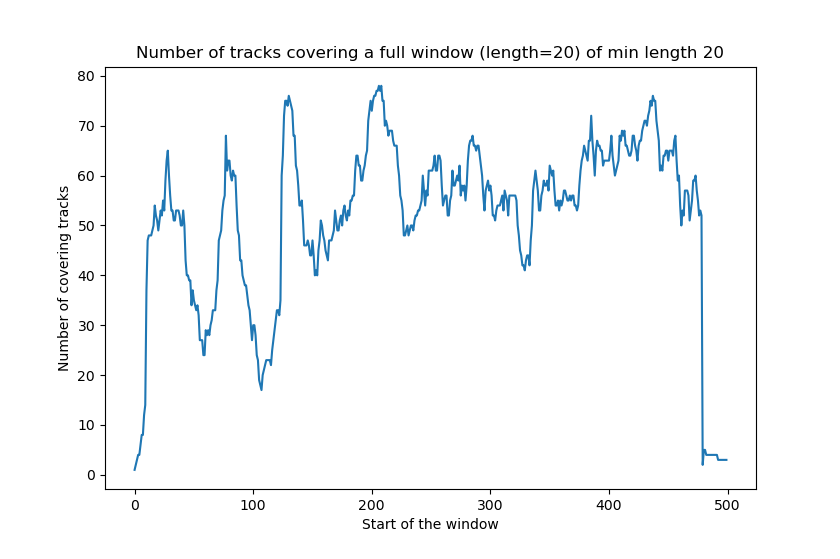

Text(0.5, 1.0, 'Number of tracks covering a full window (length=20) of min length 20')

In [84]:
%matplotlib notebook
plt.plot(all_num)
plt.xlabel("Start of the window")
plt.ylabel("Number of covering tracks")
plt.title(f"Number of tracks covering a full window (length={window_len}) of min length {min_len}")

# Same data, but stitched

In [21]:
fname = f'clust_df_dat_{which_suffix}-stitched.pickle'
with open(fname, 'rb') as f:
    clust_df2 = pickle.load(f)
    

In [22]:
all_len2 = clust_df2['slice_ind'].apply(len)

Text(0.5, 1.0, 'Stitched tracks (minimum=20)')

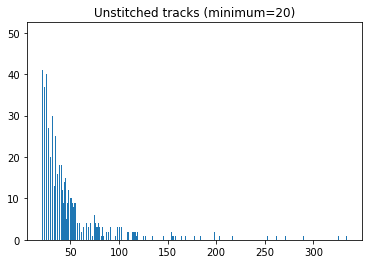

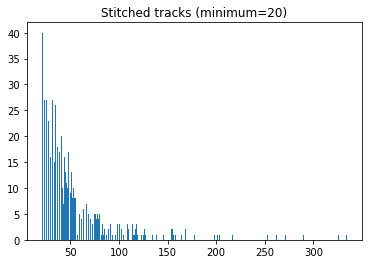

In [25]:
%matplotlib inline

min_len = 20
num_frames = 500
bins = int((num_frames-min_len))
plt.hist(all_len[all_len>min_len], bins=bins);
plt.title(f"Unstitched tracks (minimum={min_len})")
plt.figure()
plt.hist(all_len2[all_len2>min_len], bins=bins);
plt.title(f"Stitched tracks (minimum={min_len})")

## Older dataset

In [14]:
fname = 'clust_df_dat_minimax.pickle'
with open(fname, 'rb') as f:
    clust_df2 = pickle.load(f)
    
# fname = 'match_dat_nominimax.pickle'
# with open(fname, 'rb') as f:
#     all_matches2, all_conf2 = pickle.load(f)

In [15]:
all_len2 = clust_df2['slice_ind'].apply(len)

Text(0.5, 1.0, 'Lengths of individual tracks (minimum=20)')

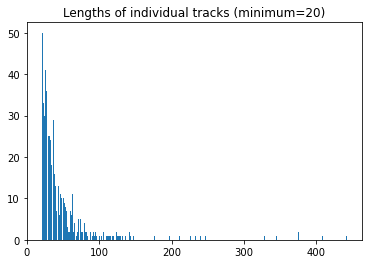

In [16]:
min_len = 20
num_frames = 500
bins = int((num_frames-min_len))
plt.hist(all_len2[all_len2>min_len], bins=bins);
plt.title(f"Lengths of individual tracks (minimum={min_len})")

In [37]:
# Fix a bug... accidentally overwrote the file
fname = 'clust_df_dat_prealigned.pickle'
with open(fname, 'wb') as f:
    pickle.dump(clust_df,f)